## Baseball Case Study

#### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

### Importing Required Libraries:-

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Impoting Dataset :-

In [2]:
data=pd.read_csv('Baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0,88.0
1,83,696,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0,86.0
2,81,669,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0,79.0
3,76,622,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0,101.0
4,74,689,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0,86.0
5,93,891,5509.0,1480.0,308.0,17.0,232.0,570.0,1151.0,88.0,670.0,609.0,3.80,7.0,10.0,34.0,88.0
6,87,764,5567.0,1397.0,272.0,19.0,212.0,554.0,1227.0,63.0,698.0,652.0,4.03,3.0,4.0,48.0,93.0
7,81,713,5485.0,1370.0,246.0,20.0,217.0,418.0,1331.0,44.0,693.0,646.0,4.05,0.0,10.0,43.0,77.0
8,80,644,5485.0,1383.0,278.0,32.0,167.0,436.0,1310.0,87.0,642.0,604.0,3.74,1.0,12.0,60.0,95.0
9,78,748,5640.0,1495.0,294.0,33.0,161.0,478.0,1148.0,71.0,753.0,694.0,4.31,3.0,10.0,40.0,97.0


By looking the data, it is observed that last raw (30th row) has only NaN values in it.

Also the problem statemet is Regression one.

#### Checking the shape of data using .shape funcion:

In [3]:
data.shape

(31, 17)

It is observed that data contains 31 rows and 17 columns.

#### Getting Information of datatype and non-null values using .info() function:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       31 non-null     object 
 1   R       31 non-null     object 
 2   AB      30 non-null     float64
 3   H       30 non-null     float64
 4   2B      30 non-null     float64
 5   3B      30 non-null     float64
 6   HR      30 non-null     float64
 7   BB      30 non-null     float64
 8   SO      30 non-null     float64
 9   SB      30 non-null     float64
 10  RA      30 non-null     float64
 11  ER      30 non-null     float64
 12  ERA     30 non-null     float64
 13  CG      30 non-null     float64
 14  SHO     30 non-null     float64
 15  SV      30 non-null     float64
 16  E       30 non-null     float64
dtypes: float64(15), object(2)
memory usage: 4.2+ KB


### Observations:

1. W AND R has no null values
2. Except W and R columns, all other 15 columns have one null value each.
3. Datatype of W and R is "Object"
4. Except W and R columns, all other 15 columns have Float64 datatype.
5. Last raw has to be eliminated.
6. Datatype of W and R needs to be converted into float64. 

#### Confirming total no. of null values in dataset using .isnull().sum() function:

In [5]:
data.isnull().sum()

W      0
R      0
AB     1
H      1
2B     1
3B     1
HR     1
BB     1
SO     1
SB     1
RA     1
ER     1
ERA    1
CG     1
SHO    1
SV     1
E      1
dtype: int64

It is confirmed that 
1. W AND R has no null values
2. Except W and R columns, all other 15 columns have one null value each.

#### Checking wheather data has all real values using numpy.isreal() :

In [6]:
data[data.applymap(np.isreal).all(1)]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


It is observed that Dataframe consists of real values only.

#### Dropping 30th row :

As it contains NaN values only

In [7]:
data=data.drop([30])
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0,88.0
1,83,696,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0,86.0
2,81,669,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0,79.0
3,76,622,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0,101.0
4,74,689,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0,86.0
5,93,891,5509.0,1480.0,308.0,17.0,232.0,570.0,1151.0,88.0,670.0,609.0,3.80,7.0,10.0,34.0,88.0
6,87,764,5567.0,1397.0,272.0,19.0,212.0,554.0,1227.0,63.0,698.0,652.0,4.03,3.0,4.0,48.0,93.0
7,81,713,5485.0,1370.0,246.0,20.0,217.0,418.0,1331.0,44.0,693.0,646.0,4.05,0.0,10.0,43.0,77.0
8,80,644,5485.0,1383.0,278.0,32.0,167.0,436.0,1310.0,87.0,642.0,604.0,3.74,1.0,12.0,60.0,95.0
9,78,748,5640.0,1495.0,294.0,33.0,161.0,478.0,1148.0,71.0,753.0,694.0,4.31,3.0,10.0,40.0,97.0


#### Converting "W" and "R" column dattype from object to numeric (int64) :

In [8]:
data[["W", "R"]] = data[["R", "R"]].apply(pd.to_numeric)

In [9]:
data.dtypes['W'],data.dtypes['R']

(dtype('int64'), dtype('int64'))

#### Pandas .describe() :-

To view some basic statistical details like percentile, mean, std etc. of a data frame.

In [10]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,58.761754,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,573.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,651.250000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,689.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,718.250000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,891.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Observations:-

Data in each looks good as mean value and standard deviation has significant difference .Also minimum, 25% ,75% and maximum values in each column has almost equal difference.

### Data visualization :

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

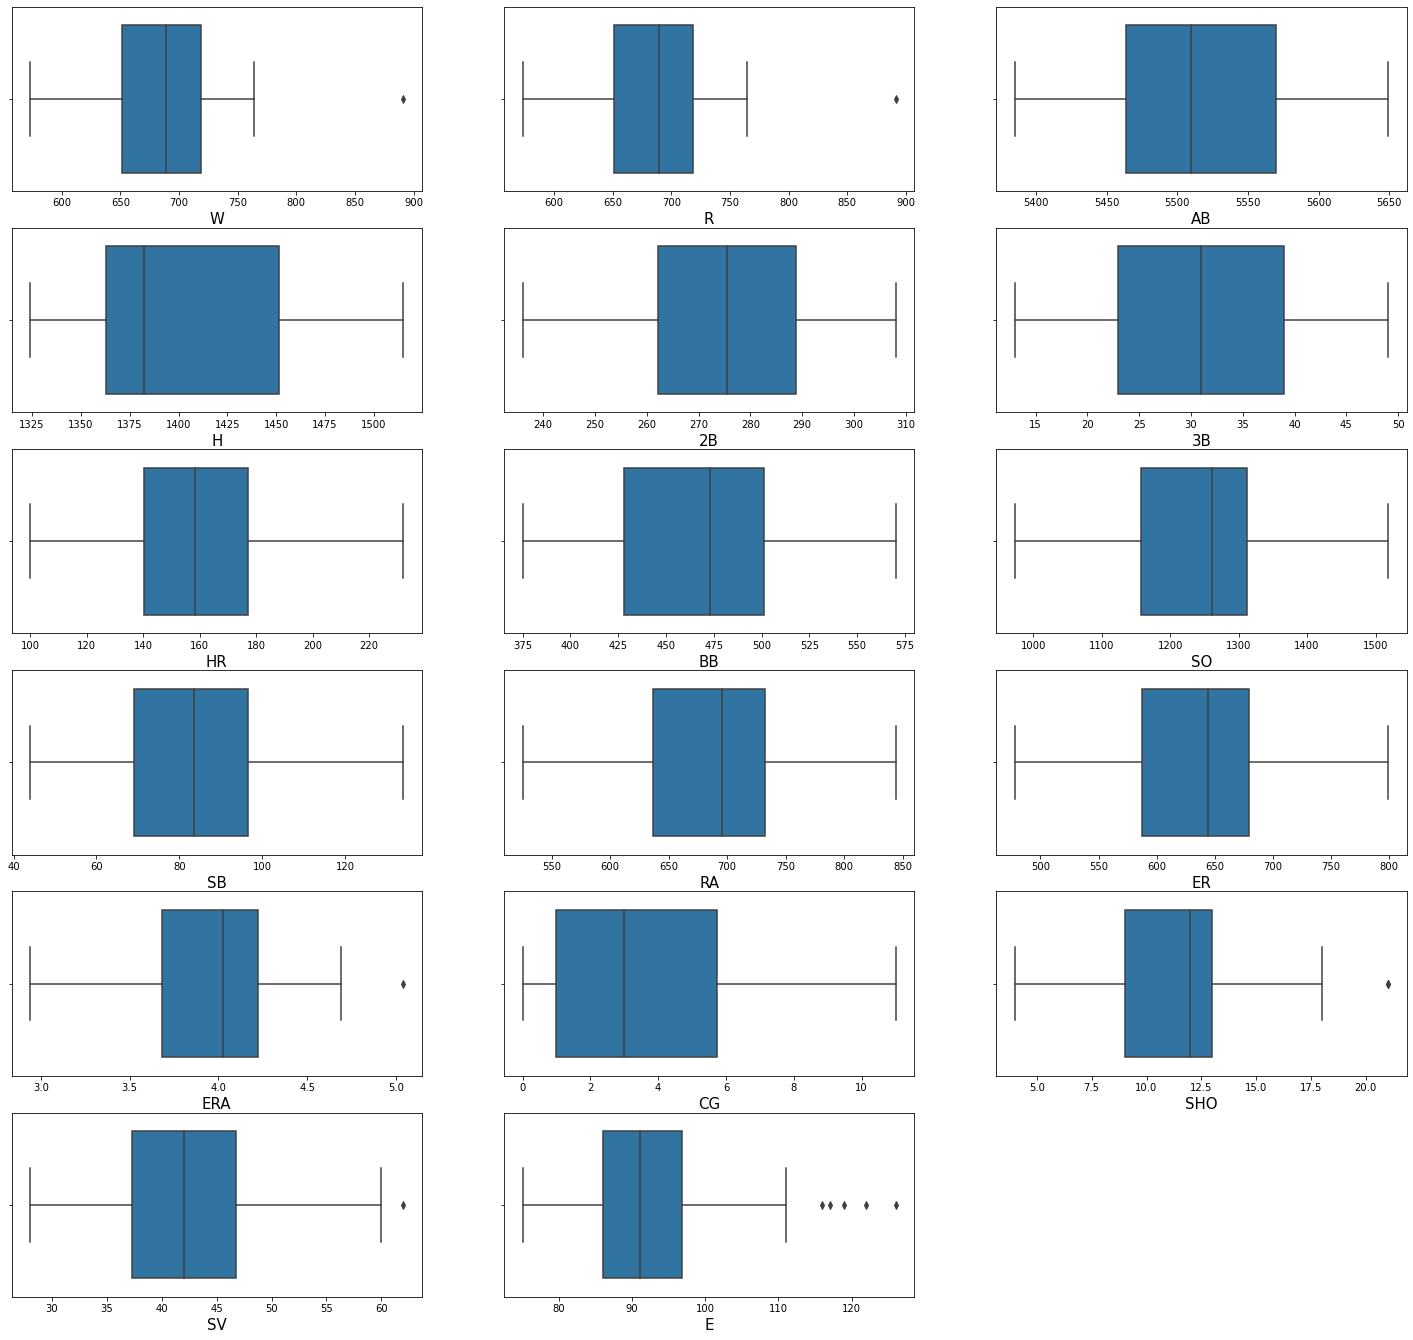

In [12]:
plt.figure(figsize=(25,40),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

#### Observation:

After observing boxplot carefully, I noticed some of the columns are having little amount of outliers. The columns having outliers are :-
1. Earned Run Average (ERA)
2. Errors(E)
3. Saves (SV)
4. Shutouts(SHO)
5. Runs(R)

Out of these above mentioned columns, Errors(E) is having maximum outliers.

To remove outliers, I'm using quantile method in Errors(E)column.

#### Removing Outliers :-

In [13]:
q=data["R"].quantile(0.99)
data=data[data["R"]<q]

q=data["E"].quantile(0.97)
data=data[data["E"]<q]

<AxesSubplot:xlabel='E'>

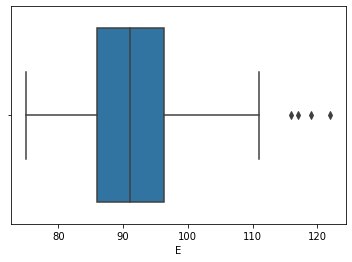

In [14]:
sns.boxplot(data["E"])

<AxesSubplot:xlabel='R'>

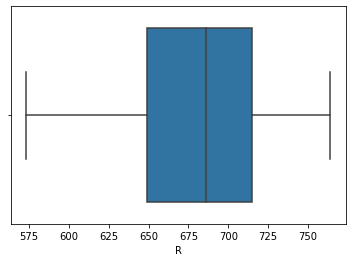

In [15]:
sns.boxplot(data["R"])

In [16]:
data.shape

(28, 17)

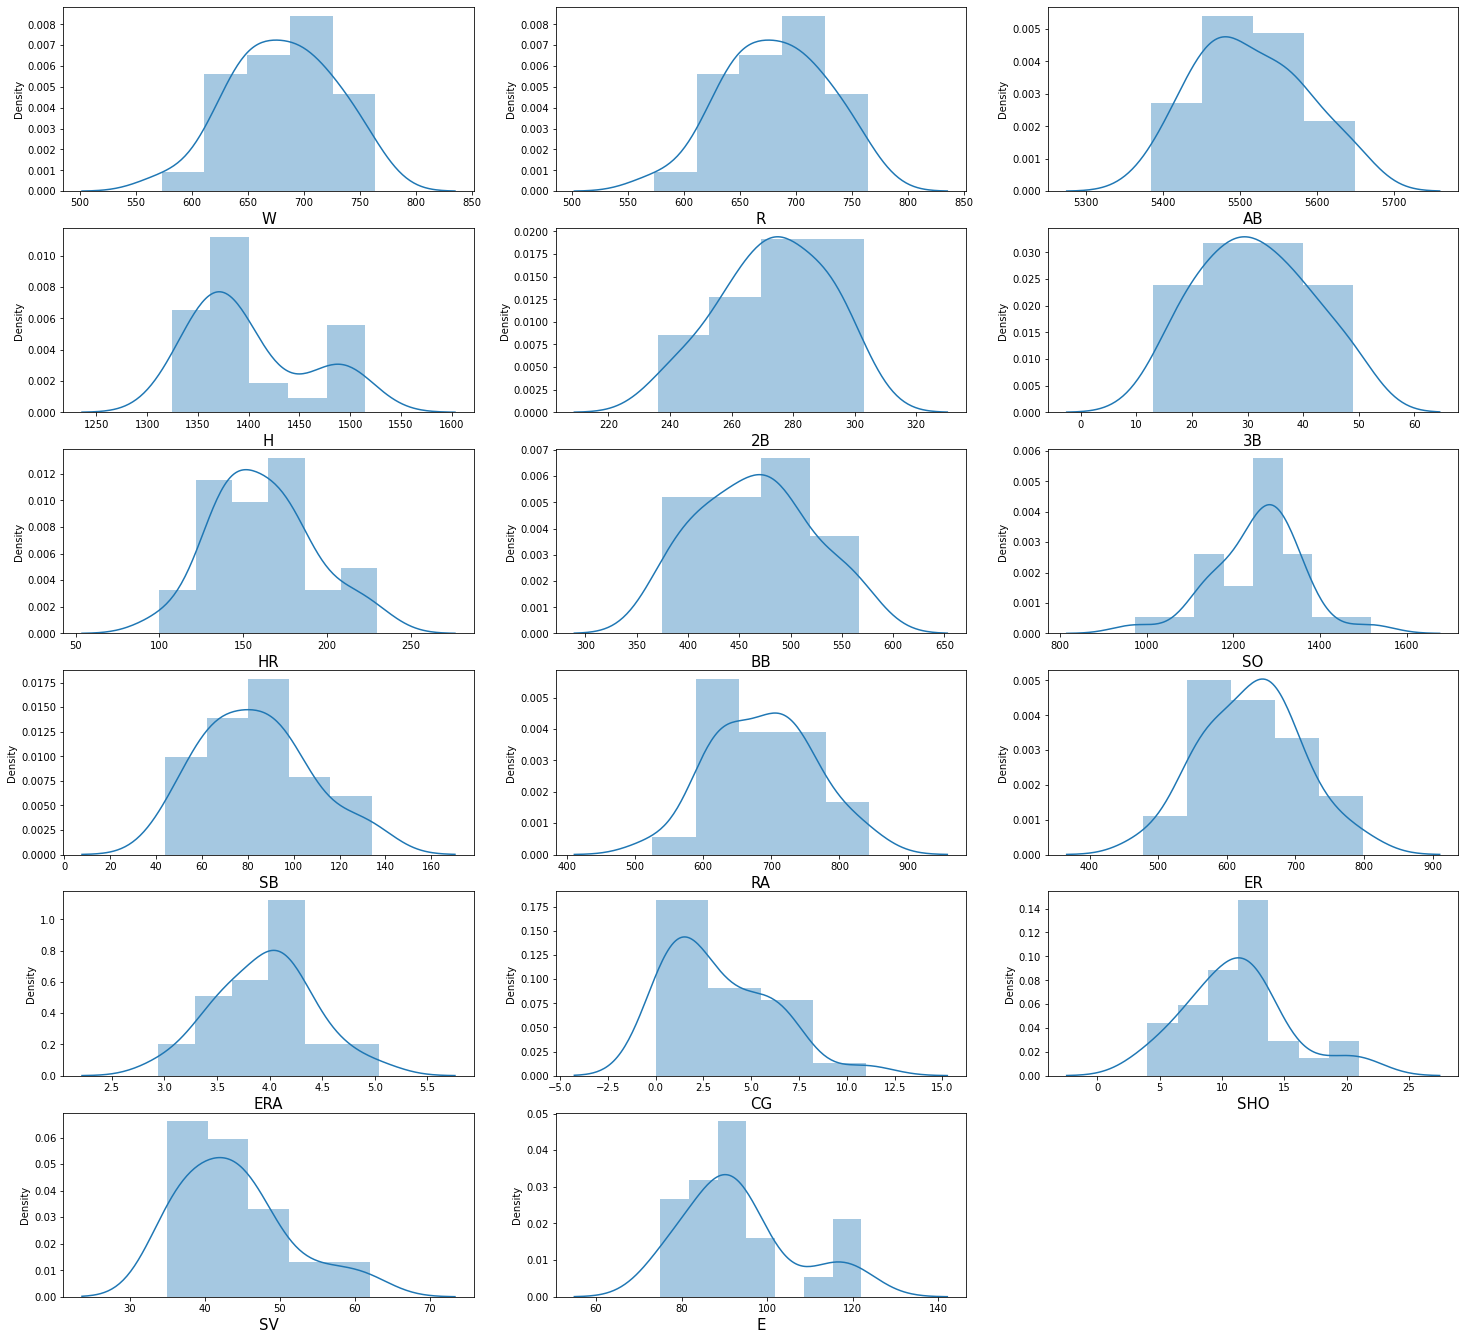

In [17]:
plt.figure(figsize=(25,40),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [18]:
data.skew()

W     -0.181903
R     -0.181903
AB     0.251401
H      0.780168
2B    -0.308731
3B     0.150284
HR     0.397052
BB     0.168344
SO    -0.315843
SB     0.463111
RA     0.074270
ER     0.059666
ERA    0.058300
CG     0.919877
SHO    0.615723
SV     0.900374
E      0.838077
dtype: float64

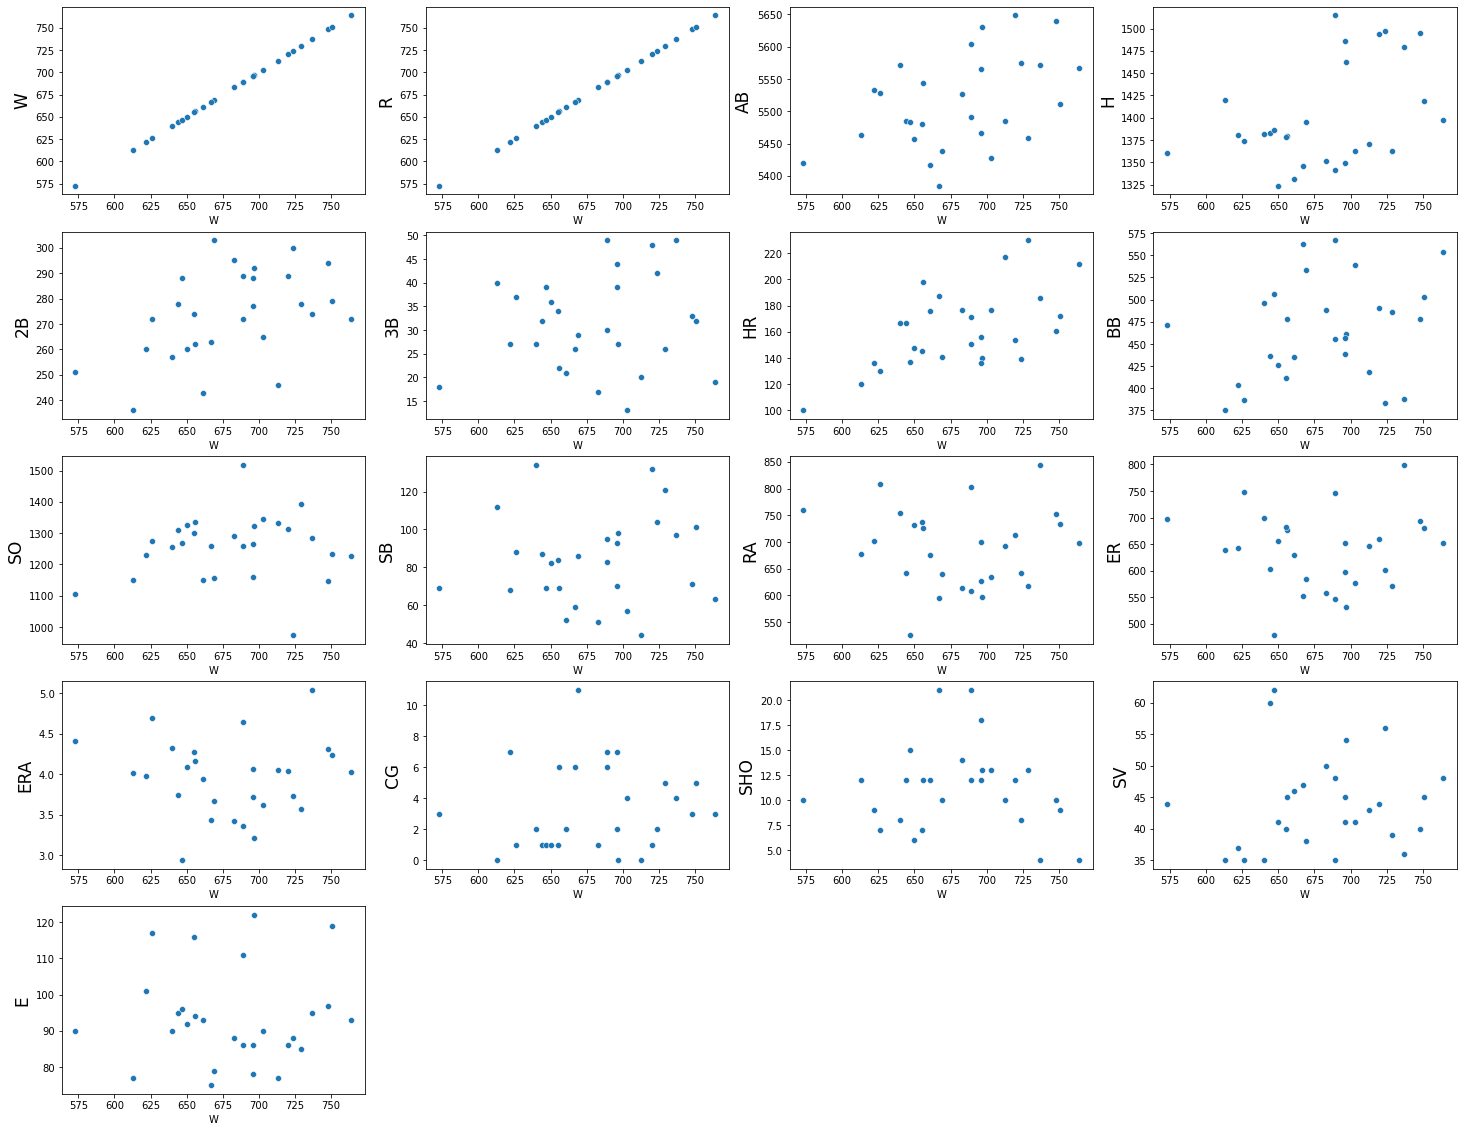

In [19]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(data['W'],data[i])
        plt.ylabel(i,fontsize=17)
    plotnumber+=1
plt.show()

<AxesSubplot:>

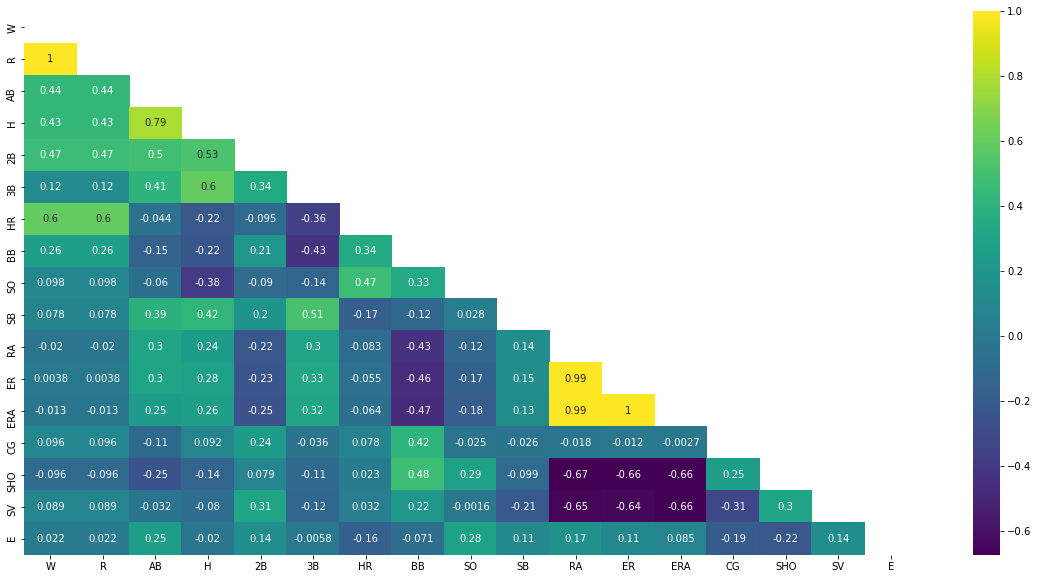

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='viridis',annot=True,mask= np.triu(data.corr()))

### Seprating dependent and independent variables :-

In [21]:
x=data.drop(columns=["W"])
y=data["W"]

### standardization of feature data :

In [22]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_scale=ss.fit_transform(x)

### Importing libraries for model :

In [23]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### finding best random state:

In [25]:
r2acc=0
maxrs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2>r2acc:
        r2acc=r2
        maxrs=i
print('max r2 acc:',r2acc,'\nmaxrs:',maxrs)

max r2 acc: 1.0 
maxrs: 1


### Splitting training and test data :

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21, 16), (21,), (7, 16), (7,))

### Applying Models :

In [28]:
# LinearRegression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)

print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print('\nmodel accuracy:',acc)
print('train score:',train_score)
print('test score:',test_score)


mean squared error :0.0

model accuracy: 1.0
train score: 1.0
test score: 1.0


In [29]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=dtr.score(x_train,y_train)
test_score=dtr.score(x_test,y_test)

In [30]:
print('\nmodel accuracy:',acc)
print('train score:',train_score)
print('test score:',test_score)


model accuracy: 0.39413907480897936
train score: 1.0
test score: 0.39413907480897936


In [31]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=abr.score(x_train,y_train)
test_score=abr.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------AdaBoost Regressor------------------

mean squared error :572.2547813411084

model accuracy:58.48%
train score:99.39%
test score:58.48%


In [32]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rfr.score(x_train,y_train)
test_score=rfr.score(x_test,y_test)
print('--------------------------Random Forest Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------Random Forest Regressor------------------

mean squared error :413.5896714285711

model accuracy:69.99%
train score:96.36%
test score:69.99%


### Calculating cross validation score :

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
m=[lr,dtr,rfr,abr] #scaled for other models for cross validation
for i in m:
    scr_=cross_val_score(i,x_scale,y,cv=5)
    print('----------',i,'------------')
    print(f'cross validation score:{scr_.mean()*100:.2f}\n')

---------- LinearRegression() ------------
cross validation score:100.00

---------- DecisionTreeRegressor() ------------
cross validation score:67.94

---------- KNeighborsRegressor() ------------
cross validation score:21.85

---------- RandomForestRegressor() ------------
cross validation score:80.74

---------- AdaBoostRegressor() ------------
cross validation score:80.89



#### On the basis of calculating difference between respective model accuracy and cv score, I observed that linear regression is the best suited model for this dataset 

### Saving models :

In [36]:
import pickle
filename='baseball_new.sav'
pickle.dump(lr,open(filename,'wb'))